**Цель проекта**


Проведение исследования исторических данных из открытых источников  о продажах игр, оценке игр пользователями и экспертами, с целью определения закономерности успешности игры для определения потенциально популярного продукта для жителей Северной Америки, Европы и Японии.


**Шаг 1. Открытие файла с данными и изучение общей информации**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats as st
import math
import matplotlib.pyplot as plt
import warnings

In [2]:
data = pd.read_csv('C:\datasets\games.csv')

In [3]:
data.shape

(16715, 11)

Датасет содержит достаточно большое количество наблюдений 16715 и 11 колонок.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


В полученном датасете имеются 11 колонок, содержащих следующую информацию:
1. Name — название игры
2. Platform — платформа
3. Year_of_Release — год выпуска
4. Genre — жанр игры
5. NA_sales — продажи в Северной Америке (миллионы проданных копий)
6. EU_sales — продажи в Европе (миллионы проданных копий)
7. JP_sales — продажи в Японии (миллионы проданных копий)
8. Other_sales — продажи в других странах (миллионы проданных копий)
9. Critic_Score — оценка критиков (максимум 100)
10. User_Score — оценка пользователей (максимум 10)
11. Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Данные представлены как количественные, так и категориальные. Типы данных строки и числа. Результат выполнения метода показывает наличие пропущенных значений во многих колонках и некоторое несоответствие типов данных названиям колонок.

In [5]:
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


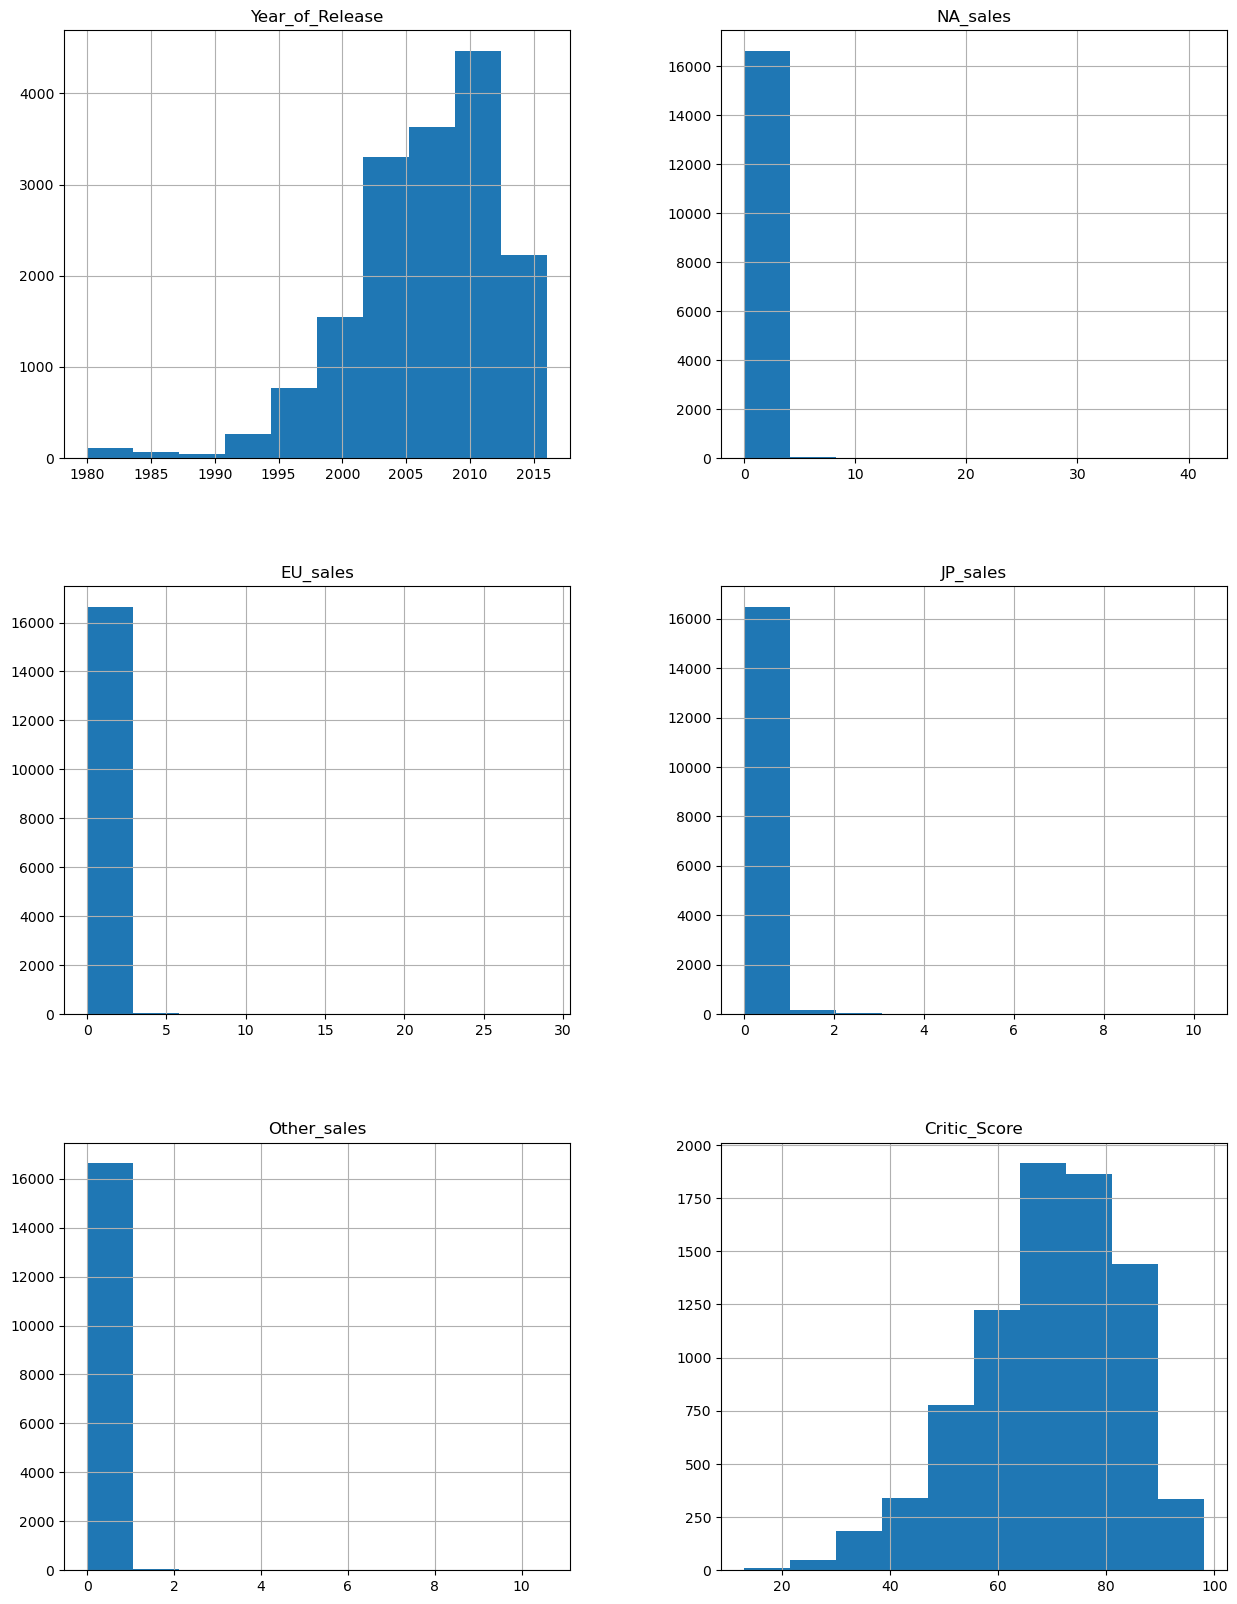

In [6]:
data.hist(figsize=(15, 20));

In [7]:
data.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

Данные датасета имеют пропущенные значения по многим колонкам:
   1. Year_of_Release     269
   2. Genre                 2
   3. Critic_Score       8578
   4. User_Score         6701
   5. Rating             6766

Необходима работа по подготовке данных для устранения выявленных недочетов.

****Шаг 2. Подготовка данных****

In [8]:
#columns = []
#for index in data.columns:
    #columns.append(index.lower())
#data.columns = columns
#data.columns
data.columns = data.columns.str.lower() 
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

Преобразование данных в нужные типы. Описание причин замены. 

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Необходима замена типа данных в колонках:
    1. year_of_release  - год выпуска на целочисленное значение;
    2. user_score - оценка пользователей (максимум 10) имеет тип данных object, необходимо заменить на численное значение float64, поскольку это  дробная числовая оценка пользователя.

In [10]:
#data['year_of_release'] = data['year_of_release'].astype('int')

In [11]:
data['year_of_release'].dtype

dtype('float64')

In [12]:
data ['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Узнаем в интернете, как  расшифровывается "tbd":  To Be Determined "Будет определено". Соответственно, игры не имеют еще оценки. Выведем на экран строки с "tbd" и посчитаем сколько их.

In [13]:
#

In [14]:
(data[data['user_score']=="tbd"]).count()

name               2424
platform           2424
year_of_release    2376
genre              2424
na_sales           2424
eu_sales           2424
jp_sales           2424
other_sales        2424
critic_score       1082
user_score         2424
rating             2374
dtype: int64

2424 строчки еще не имеют оценки пользователей. Заменим значение на NaN, потом изменим тип данных со строкового на числовой.

In [15]:
data.loc[data['user_score']=="tbd", 'user_score']=np.nan
data['user_score'] = data['user_score'].astype(float)

In [16]:
(data[data['user_score']=="tbd"]).count()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

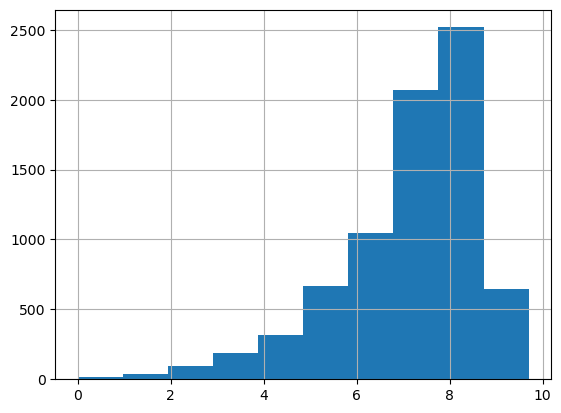

In [17]:
data ['user_score'].hist();

Проверили что не осталось tbd и посмотрели картину на гистограмме. 

Обработка пропусков данных по порядку столбцов в датасете.

In [18]:
data[data['name'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Удалим 2 строчки, поскольку нельзя узнать названия игр и 2 строчки - это очень маленькая часть значений, сбросим индексы и проверим результат.

In [19]:
data = data.dropna(subset = ['name'])

In [20]:
data=data.reset_index(drop = True)

Заменим пустые значения столбца year_of_release на ноль и проверим результат.

In [21]:
data['year_of_release'] = data['year_of_release'].fillna(0)

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


Пропущенные значения в столбцах critic_score, user_score оставим без изненений, поскольку данные об оценке отсутствуют, а медианные значения изменят  общую картину данных и исказят результаты.

In [23]:
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16708,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16709,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16710,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [24]:
data['name'].value_counts()

Need for Speed: Most Wanted                         12
Ratatouille                                          9
LEGO Marvel Super Heroes                             9
FIFA 14                                              9
Madden NFL 07                                        9
                                                    ..
Jewels of the Tropical Lost Island                   1
Sherlock Holmes and the Mystery of Osborne House     1
The King of Fighters '95 (CD)                        1
Megamind: Mega Team Unite                            1
Haitaka no Psychedelica                              1
Name: name, Length: 11559, dtype: int64

In [25]:
print(data['rating'].value_counts(), data['rating'].isna().sum())

E       3990
T       2961
M       1563
E10+    1420
EC         8
K-A        3
RP         3
AO         1
Name: rating, dtype: int64 6764


Данные столбца rating можно заполнить по возможности следующим образом: одни и те же игры выходят на разных платформах. Можно посмотреть какое значение рейтинга у игры на другой платформе и заполнить отсутствующее значение. 

In [26]:
name_rating = data.set_index("name")['rating'].dropna().to_dict()

def find_rating (row):
    if pd.isna(row['rating']):

        return name_rating.get(row['name'])
    return row['rating']

data['rating'] = data.apply(find_rating, axis=1)
data['rating'] = data['rating'].fillna(0)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           16713 non-null  object 
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


Остальные пропуски данных колонки rating заполнить не представляется возможным, оставим оставшиеся пропуски без изменения.


Создадим столбец с общими данными по продажам в регионах.

In [27]:
data['total_sales'] = data[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)

data['total_sales']

0        82.54
1        40.24
2        35.52
3        32.77
4        31.38
         ...  
16708     0.01
16709     0.01
16710     0.01
16711     0.01
16712     0.01
Name: total_sales, Length: 16713, dtype: float64

Проверим датасет на явные дубликаты.

In [28]:
data.duplicated().sum()

0

Явные дубликаты отсутствуют.


Посчитаем количество уникальных значений в столбце name.

In [29]:
len(data['name'].unique())

11559

In [30]:
data['name'].value_counts()

Need for Speed: Most Wanted                         12
Ratatouille                                          9
LEGO Marvel Super Heroes                             9
FIFA 14                                              9
Madden NFL 07                                        9
                                                    ..
Jewels of the Tropical Lost Island                   1
Sherlock Holmes and the Mystery of Osborne House     1
The King of Fighters '95 (CD)                        1
Megamind: Mega Team Unite                            1
Haitaka no Psychedelica                              1
Name: name, Length: 11559, dtype: int64

Поскольку игры выходят на разных платформах, названия могут повторятся. 

Предобработка данных завершена. Были обнаружены и обработаны пропуски, некоторые пропуски пришлось оставить, поскольку заполнить значения нет возможности, а данные из других колонок представляют ценность. Буду учитывать это при проведении анализа. Добавлен столбец с суммарными продажами по всем регионам.

**Шаг 3. Проведение исследовательского анализа данных** 

Посмотрим в какие годы выпускались игры.


In [31]:
data['year_of_release'].describe()

count    16713.000000
mean      1974.191348
std        252.574959
min          0.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2016.000000
Name: year_of_release, dtype: float64

Мы видим минимальное значение 0, посмотрим на данные под другим углом с помощью метода value_counts().

In [32]:
data['year_of_release'].value_counts()

2008.0    1427
2009.0    1426
2010.0    1255
2007.0    1197
2011.0    1136
2006.0    1006
2005.0     939
2002.0     829
2003.0     775
2004.0     762
2012.0     653
2015.0     606
2014.0     581
2013.0     544
2016.0     502
2001.0     482
1998.0     379
2000.0     350
1999.0     338
1997.0     289
0.0        269
1996.0     263
1995.0     219
1994.0     121
1993.0      60
1981.0      46
1992.0      43
1991.0      41
1982.0      36
1986.0      21
1989.0      17
1983.0      17
1990.0      16
1987.0      16
1988.0      15
1985.0      14
1984.0      14
1980.0       9
Name: year_of_release, dtype: int64

Самые ранние данные о выходе игр приходятся на 1980 год  и уже 9 игр за год! Ограничим данные для построения графика минимальным значением 1980 годом.

In [33]:
data['year_of_release'] = data['year_of_release'].astype('int')

In [34]:
r=data.query('year_of_release== 1980')[['platform', 'name', 'genre']]
r

,platform,name,genre
262,2600,Asteroids,Shooter
546,2600,Missile Command,Shooter
1763,2600,Kaboom!,Misc
1967,2600,Defender,Misc
2649,2600,Boxing,Fighting
4018,2600,Ice Hockey,Sports
5359,2600,Freeway,Action
6299,2600,Bridge,Misc
6874,2600,Checkers,Misc


In [35]:
data[data['year_of_release'] >= 1980]['year_of_release'].min()

1980

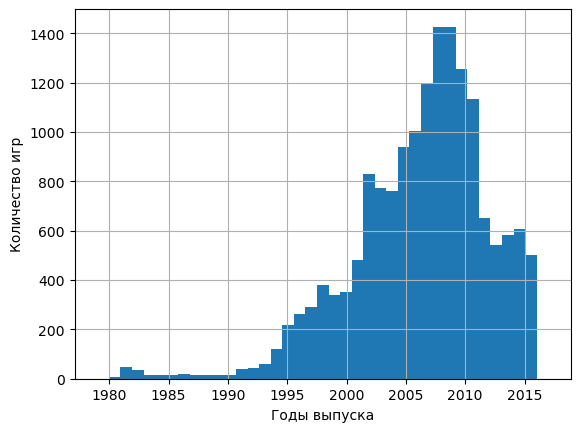

In [36]:
gr = data['year_of_release'].hist(bins=39, range=(1979, 2017))
gr.set(xlabel='Годы выпуска', ylabel='Количество игр')
gr;

На гистограмме частотности видны пики 2008 и 2009 года когда активность выхода игр на платформах достигала  значений выше 1400 шт. Если посмотреть на график, мы видим стабильный, местами скачкообразный, рост индустрии с 1994 года, скачки роста почти в 2 раза с 482 до 829 в 2001 и 2002 годах, далее 2003 - 2004 небольшой спад в пределах 8% до 762, далее скачек до 2005 года и стремительный рост до 2009 года, а потом наблюдается картина спада, сначала на 13% к 2010 году, потом еще на 10% с 2010 к 2011 году, и далее обвал на 73% к 2012 году до уровня 653 с постепенным дальнейшим снижением. Я поискала в интернете информацию о таком большом падении выпуска игр и продаж, нашла статьи того времени Коммерсанта и других изданий, сообщающих о спаде на рынке, но причины падения не указывались, я тоже затрудняюсь их объяснить, был кризис мировой 2008 года, но рынок компьютерных  игр был на подъеме в это время, что случилось в 2012 году остается для меня непонятным.

Посмотрим как менялись продажи по платформам.

In [37]:
platform_sales = data.groupby('platform')['total_sales'].sum().sort_values(ascending = False).reset_index()
platform_sales

,platform,total_sales
0,PS2,1255.77
1,X360,971.42
2,PS3,939.65
3,Wii,907.51
4,DS,806.12
5,PS,730.86
6,GBA,317.85
7,PS4,314.14
8,PSP,294.05
9,PC,259.52


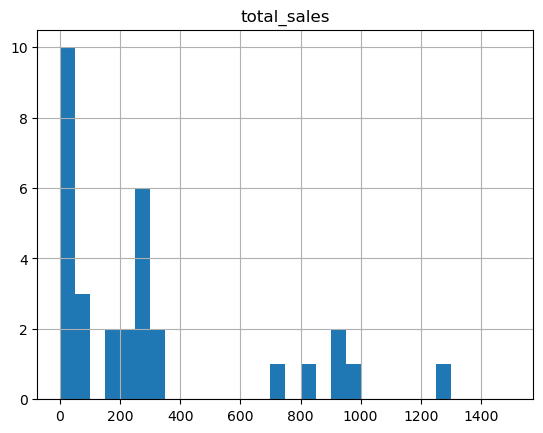

In [38]:
platform_sales.hist(bins=30, range=(0, 1500));

Посмотрим данные на гистограмме, как видно разрыв в объемах продаж по платформам очень большой. Возьмем 10 самых популярных платформ и посмотрим их на графике по годам.

In [39]:
popul_platforms = platform_sales.loc[:9, 'platform'].values
popul_platforms

array(['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'GBA', 'PS4', 'PSP', 'PC'],
      dtype=object)

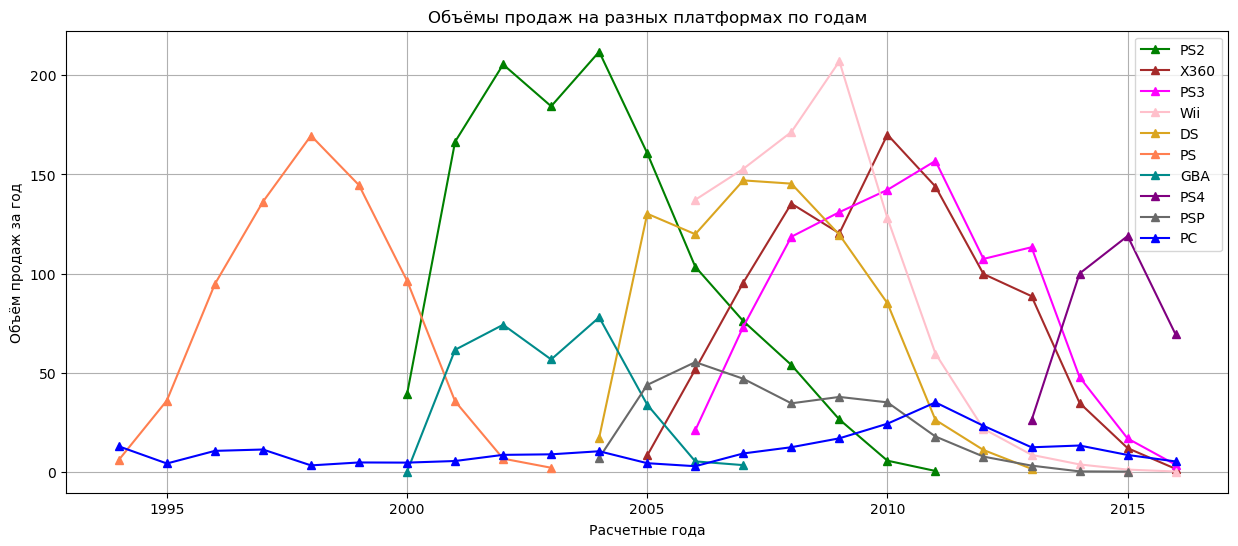

In [40]:
colors = ['green','brown','magenta','pink','goldenrod','coral','darkcyan','purple','dimgray','blue']

plt.figure(figsize=(15, 6))
plt.grid()
plt.title('Объёмы продаж на разных платформах по годам')

mean_year_life = 0
color_idx = 0
for pl in popul_platforms:
    platform  = data.query('platform == @pl & year_of_release>=1994').groupby('year_of_release')['total_sales'].sum()
    mean_year_life += platform.count()
    platform.plot(x=platform.index, y=platform.values, style='-^', color=colors[color_idx], \
                  label=pl, grid=True);
    color_idx=(color_idx+1) % len(colors);
plt.xlabel('Расчетные года')    
plt.ylabel('Объём продаж за год')
plt.legend()
plt.show();

In [41]:
mean_year_life/len(popul_platforms)

11.3

Таким образом видно, что средний срок существования платформы составляет 11 лет, это можно видеть и на графике выше. посмотрим данные отдельно по платформам.

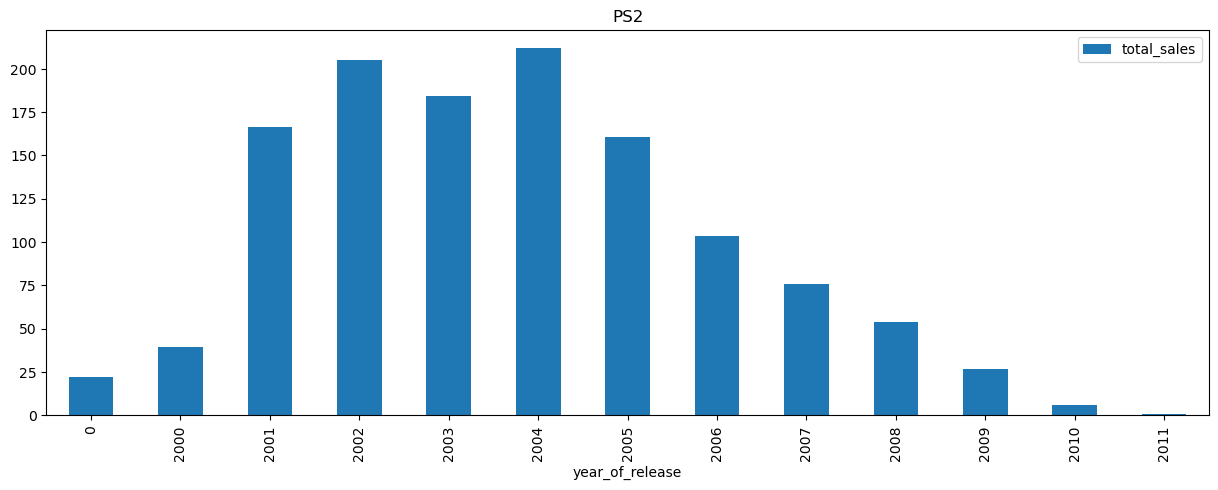

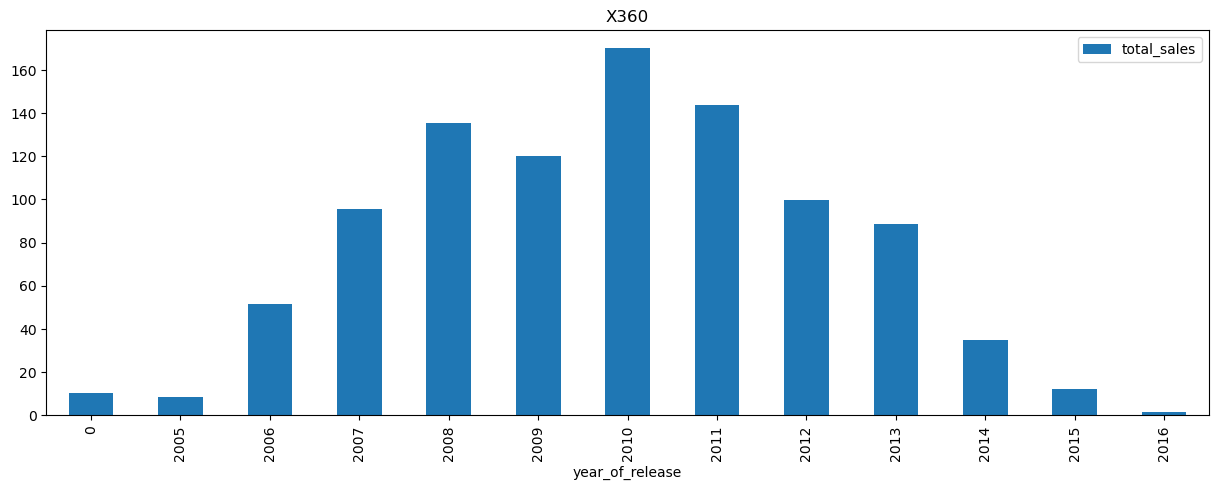

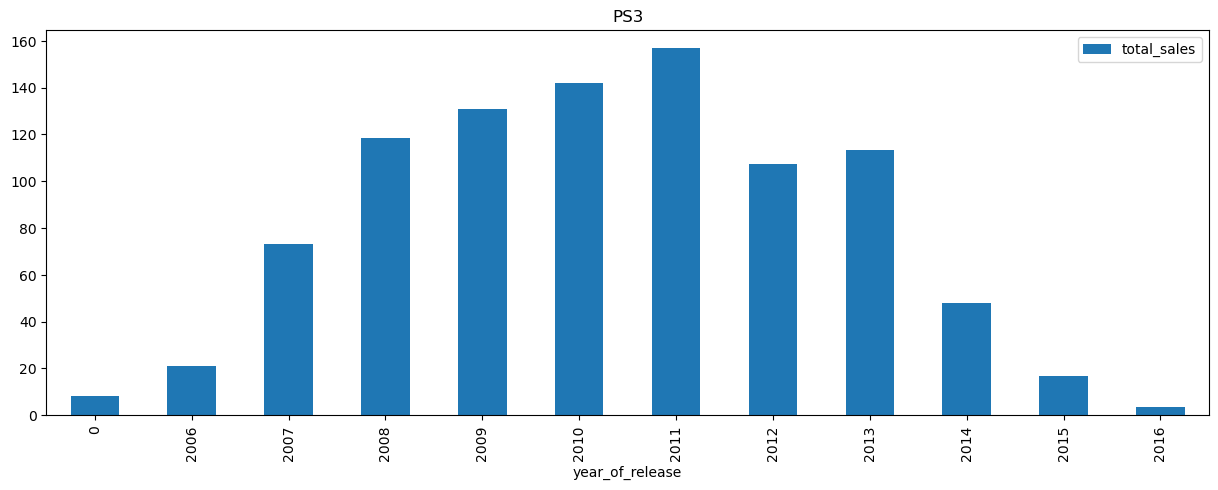

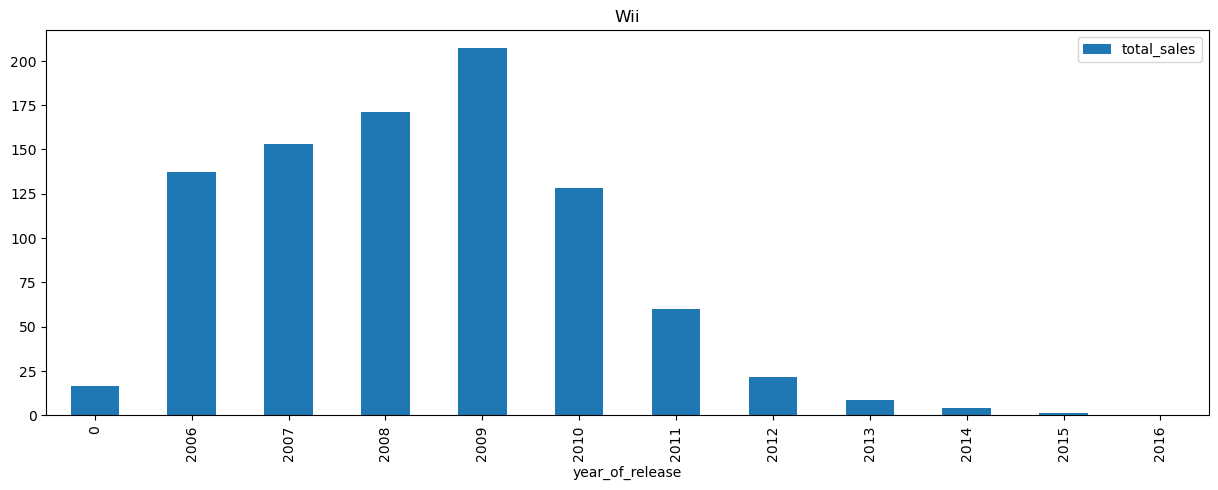

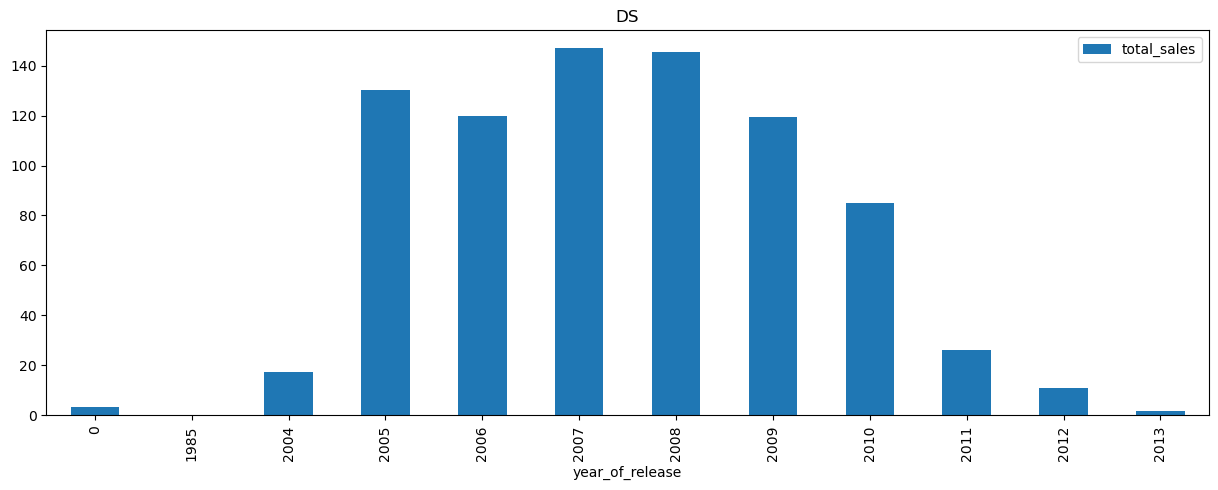

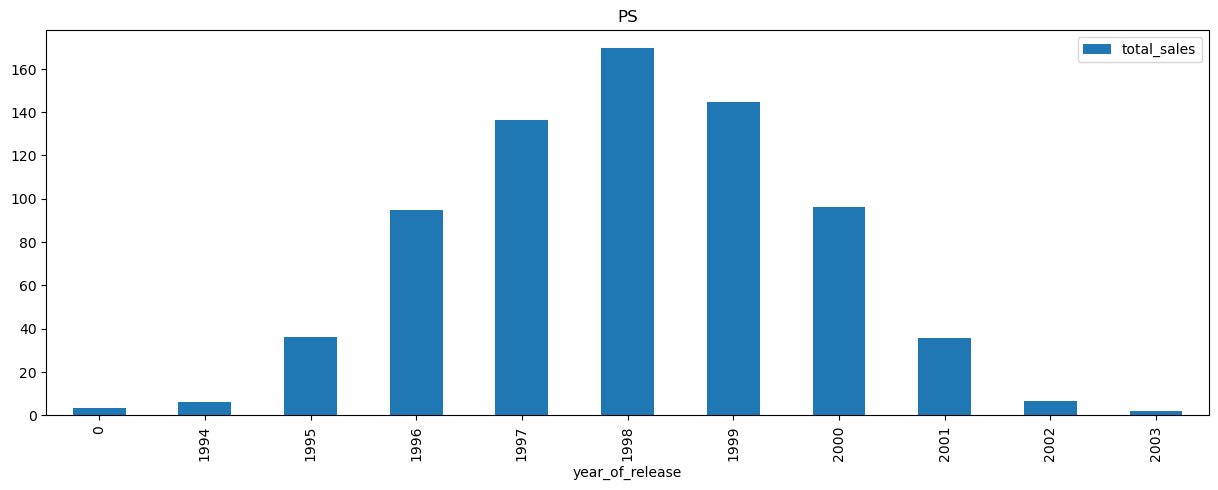

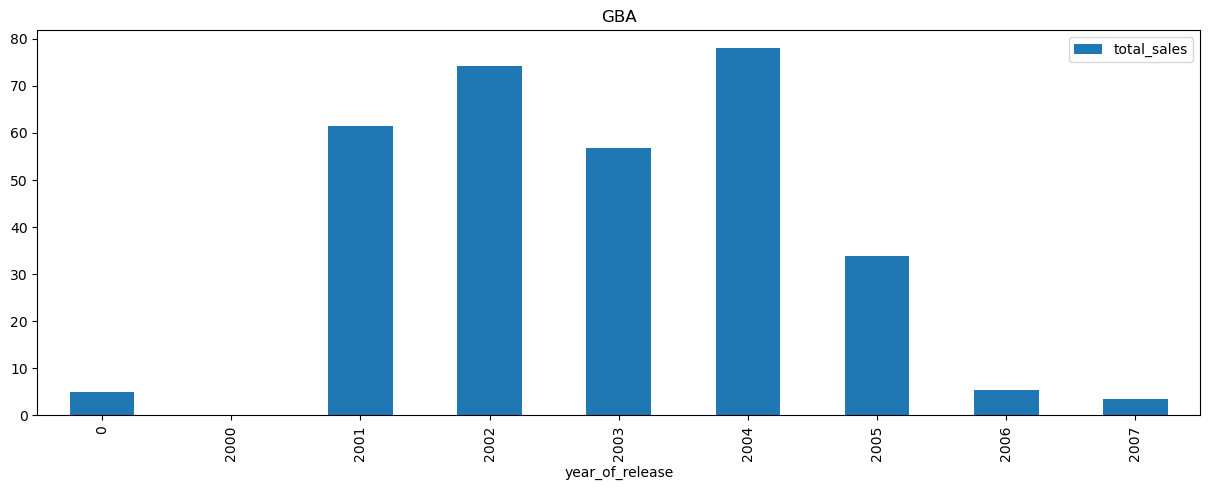

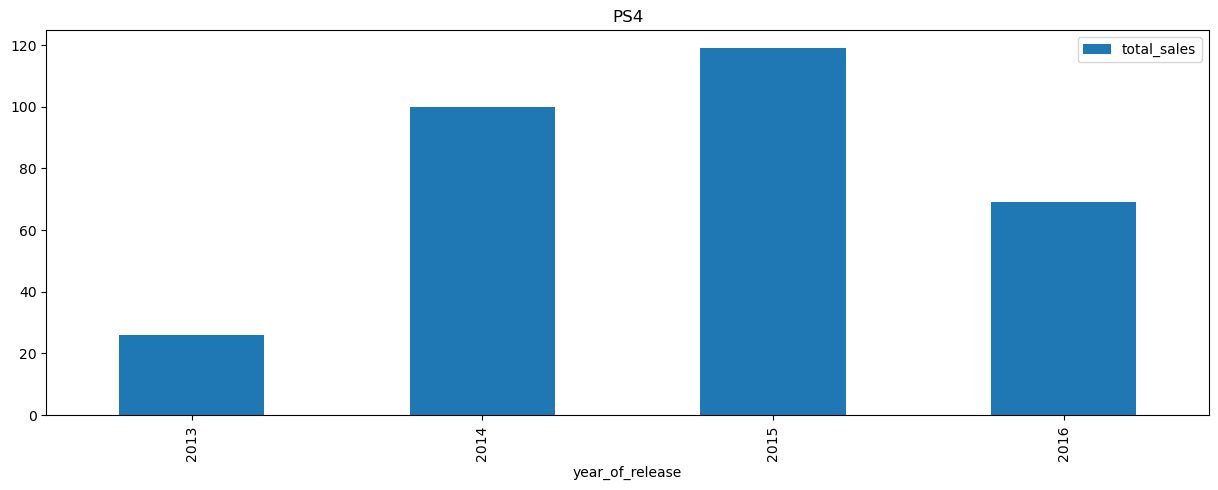

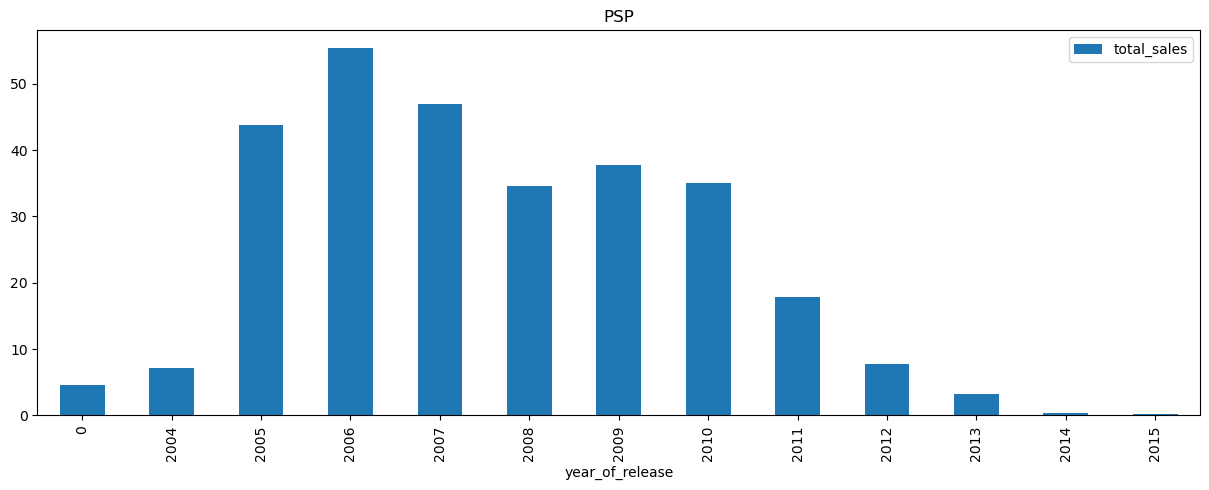

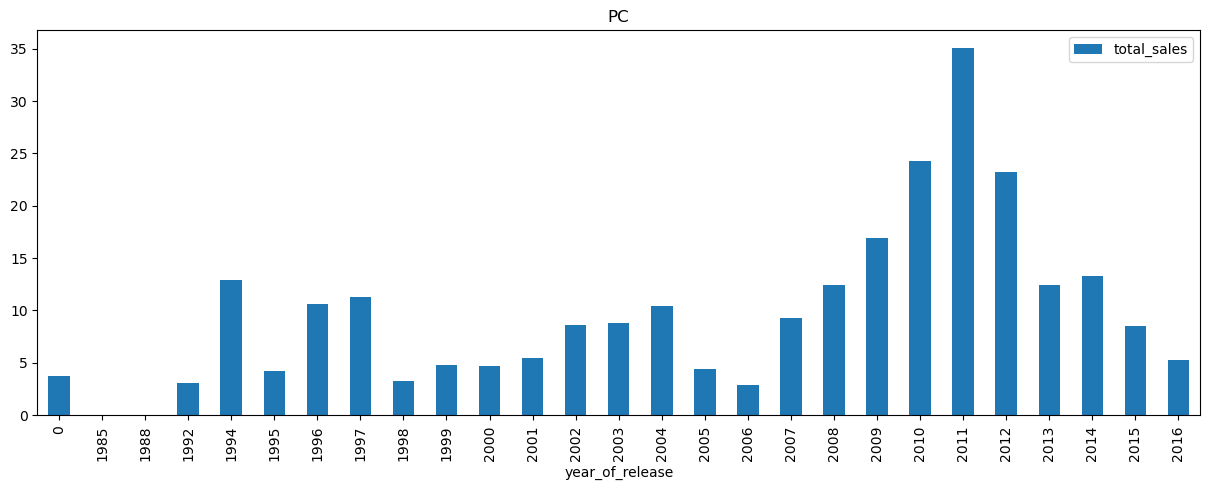

In [42]:
for platform in popul_platforms:
    data[data['platform'] == platform].pivot_table(index = 'year_of_release',
                                                   values = 'total_sales',
                                                   aggfunc = 'sum').plot(kind = 'bar', figsize=(15,5))
    plt.title(platform)

Данные в графиках говорят о появлении и уходе с рынка платформ в среднем с циклом в 10 лет.


Данные за актуальный период для прогноза на 2017 год, с учетом быстрого изменения картины рынка индустрии компьютерных игр, я возьму с 2014 по 2016 год.

In [43]:
actual_data = data.query('year_of_release >= 2014')

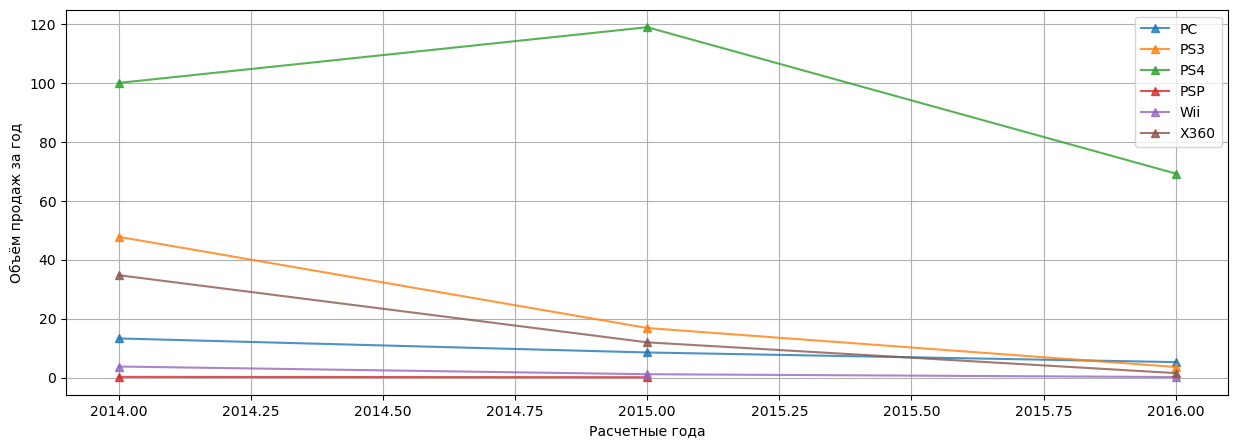

In [44]:
actual_data.query('platform in @popul_platforms').pivot_table(index='year_of_release', 
                                                              columns = 'platform', values='total_sales',
                                                              aggfunc='sum').plot(figsize=(15, 5), style='-^',
                                                                                  alpha=0.8, grid=True)
plt.xlabel('Расчетные года')    
plt.ylabel('Объём продаж за год')
plt.legend()
plt.show();

На графике четко видно волна развития платформ, которая завершается к 2015 - 2016 годам. Продажи их падают,  но есть одна платформа PS4, которая создана в 2013 году и она находится в начале своего цикла развития, по моему мнению, данная платформа, в отличии от остальных, является перспективной. Так же нужно обратить на РС, график более плоский, имеет широкое распределение, возможно РС тоже можно выделить, как перспективное направление.

In [45]:
w=data.query('platform == "PC" & year_of_release == 2016')[['total_sales']].sum()
w

total_sales    5.25
dtype: float64

5 млн копий продано в 2016 году на платформе РС, не так много как у крупных платформ, но это стабильный результат. Без резких пиков и резких падений.

Построим графики "ящик с усами" для наиболее популярных платформ.

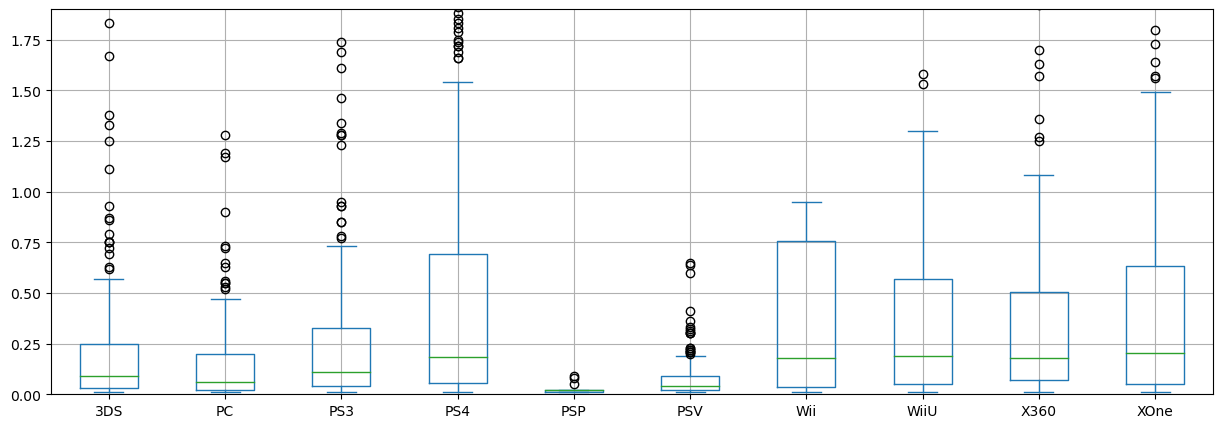

In [46]:
actual_data.pivot_table(index = 'name', 
                        columns = 'platform',
                        values = 'total_sales',
                        aggfunc = 'sum').plot(kind='box', ylim=(0,1.9), figsize=(15,5), grid=True);

Как видно на графике лидерами являются платформы PS4, Wii, далее XOne, которая не являлась лидером по количеству игр ( всего 159.32) и занимала 17 место в рейтинге платформ по количеству игр, и не участвовала в прошлых графиках 10 платформ по количеству игр, но на графике "ящик с усами", эта платформа показывает хорошие результаты продаж, похожие на PS4, тоже выделим ее как перспективную. Далее Wiu с небольшим отрывом.


Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков на примере X360.

In [47]:
one_platform = actual_data.query('platform=="X360"'
                                )[['total_sales', 'critic_score', 'user_score']].dropna().reset_index(drop=True)

In [48]:
one_platform.corr()

,total_sales,critic_score,user_score
total_sales,1.000000,0.525723,0.336514
critic_score,0.525723,1.000000,0.625309
user_score,0.336514,0.625309,1.000000


Расчёт корреляции позволяет сделать  выводы:  связь между продажами во всех регионах и отзывами пользователя прямая, но не очень значительная (0.33), а вот связь между продажами и отзывами критиков уже больше (0.53), это средний уровень прямой связи. Среднюю прямую связь имеет оценка пользователей и оценка критиков между собой (0.62).

Коэффициент корреляции:  0.53


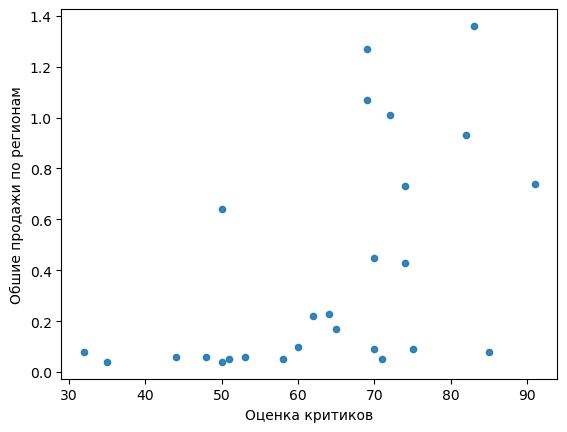

In [49]:
print("Коэффициент корреляции: ", round ( actual_data.query(
    'platform=="X360"')['total_sales'].corr(actual_data.query(
    'platform=="X360"')['critic_score']), 2))
        
one_platform_gr = actual_data.query('platform=="X360"')[
    ['total_sales', 'critic_score']
].plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.9);    
one_platform_gr.set(xlabel='Оценка критиков', ylabel='Обшие продажи по регионам')
one_platform_gr;

Как видно на графике, оценка корреляции между общими продажами и оценкой критиков равна 0.53. Связь есть, она определяется как средняя прямая связь.

Коэффициент корреляции:  -0.14


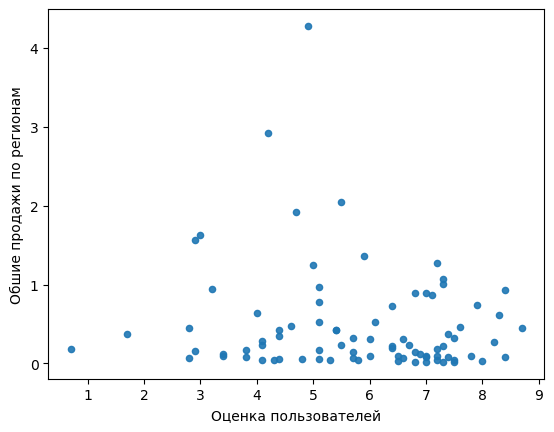

In [50]:
print("Коэффициент корреляции: ", round ( actual_data.query(
    'platform=="X360"')['total_sales'].corr(actual_data.query(
    'platform=="X360"')['user_score']), 2))
        
one_platform_gr = actual_data.query('platform=="X360"')[
    ['total_sales', 'user_score']
].plot(x='user_score', y='total_sales', kind='scatter', alpha=0.9);    
one_platform_gr.set(xlabel='Оценка пользователей', ylabel='Обшие продажи по регионам')
one_platform_gr;

Как видно на графике, оценка корреляции между общими продажами и оценкой пользователей равна - 0.14. Это совсем незначительная обратная связь.  Можно сказать что оценки пользователей никак не влияют на продажи на платформе X360.

Соотнесем полученные выводы с данными на других платформах.


Коэффициент корреляции:  0.33


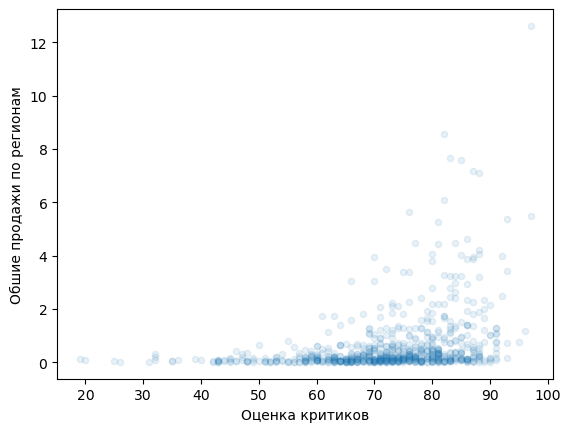

In [51]:
print("Коэффициент корреляции: ", round ( actual_data['total_sales'].corr(actual_data['critic_score']), 2))
        
one_platform_gr = actual_data.plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.1);    
one_platform_gr.set(xlabel='Оценка критиков', ylabel='Обшие продажи по регионам')
one_platform_gr;

График по всем платформам показывает слабую зависимость продаж от мнения критиков (0.33) , но зависимость продаж от мнения пользователей отсутствует. Значение корреляции -0.01.

Коэффициент корреляции:  -0.01


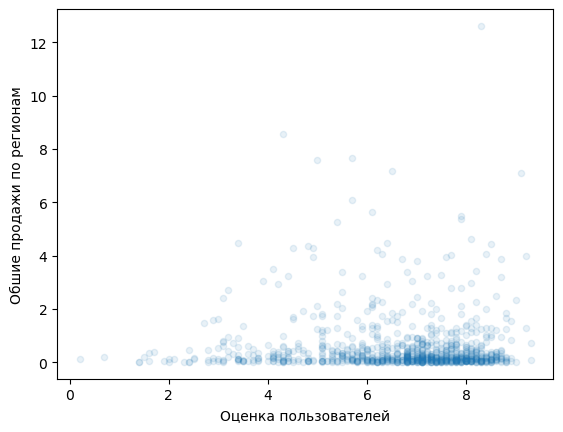

In [52]:
print("Коэффициент корреляции: ", round ( actual_data['total_sales'].corr(actual_data['user_score']), 2))
        
one_platform_gr = actual_data.plot(x='user_score', y='total_sales', kind='scatter', alpha=0.1);    
one_platform_gr.set(xlabel='Оценка пользователей', ylabel='Обшие продажи по регионам')
one_platform_gr;

Посмотрим общее распределение игр по жанрам. 

In [53]:
genres = actual_data.groupby('genre')['name'].count().sort_values(ascending=False)
genres

genre
Action          619
Role-Playing    221
Adventure       185
Sports          161
Shooter         128
Misc            113
Racing           69
Fighting         60
Simulation       44
Platform         38
Strategy         37
Puzzle           14
Name: name, dtype: int64

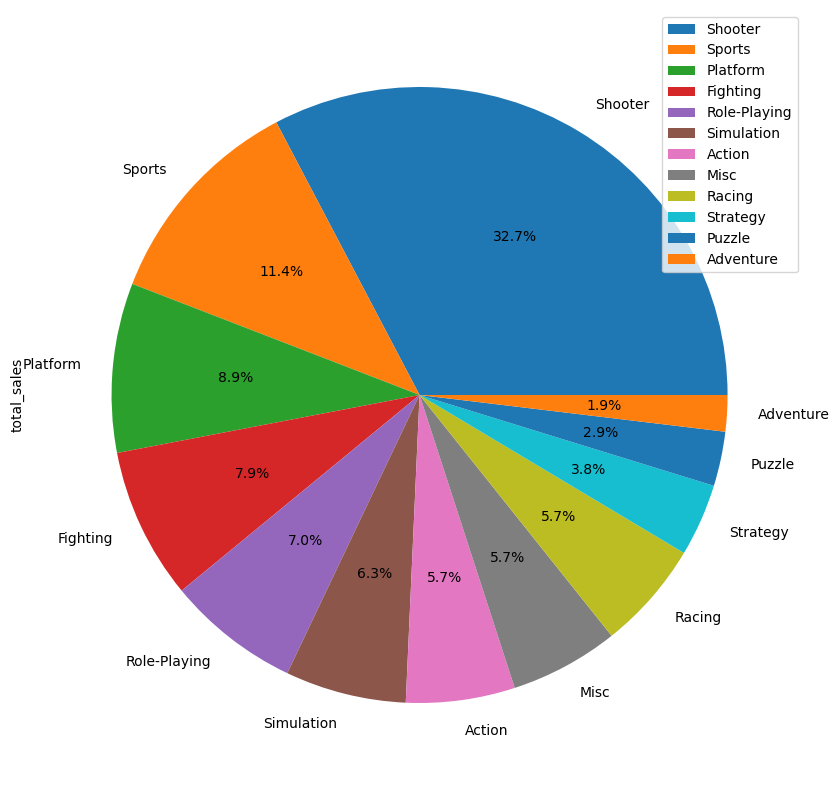

In [54]:
actual_data.pivot_table(
    index = 'genre', values = 'total_sales', aggfunc = 'median'
    ).sort_values(ascending=False, by = 'total_sales'
    ).plot(kind='pie', figsize=(10,10), y= 'total_sales', autopct='%1.1f%%');

Самые большие продажи занимает жанр стрелялки (почти 33%). Далее с болшим отрывом идут спортивные  игры (11,4%) и стрелялки (почти (9%). Самые не приносящие прибыль жанры это приключения и пазлы. 

Исследование данных позволило узнать многое о мировой индустрии игр. Оказалось, что большая волна популярности очень многих платформ подошла к концу и осталось совсем мало платформ, подающих надежду. Были исследованы года выпуска игр, данные о продажах на платформах по регионам, определена связь между продажами и отзывами пользователей и критиков. Выяснен временной интервал жизни платформы. 

**Шаг 4. Портрет пользователя каждого региона.**

Посмотрим на самые популярные платформы в Северной Америке.

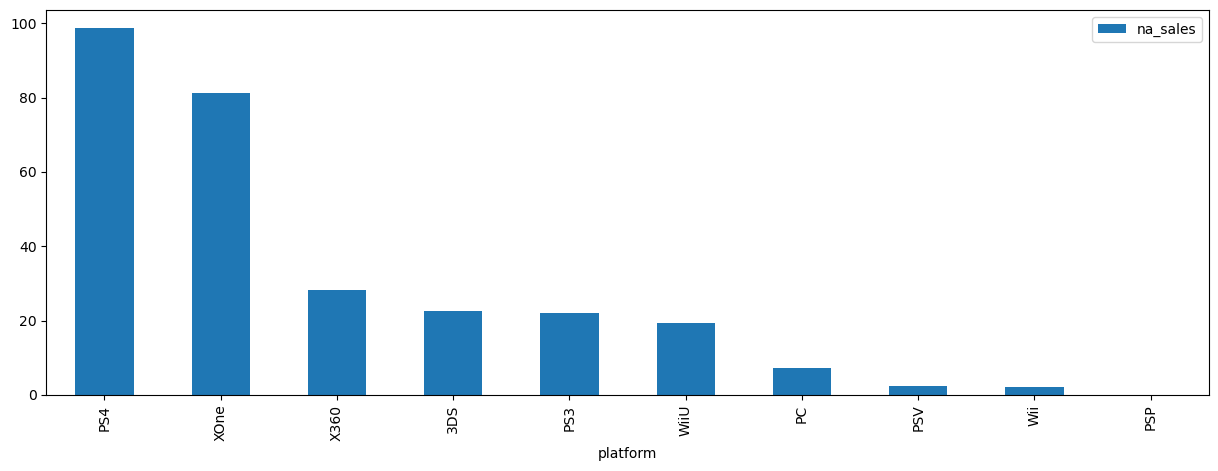

In [55]:
actual_data.pivot_table(
    index = 'platform', values = 'na_sales', aggfunc = 'sum'
    ).sort_values(ascending=False, by = 'na_sales'
    ).plot(kind = 'bar', figsize=(15,5)
    );

Самыми популярными среди жителей Северной Америки оказалась платформа PS4, затем Xone, далее уже намного ниже результаты  X360, 3DS и PS3, DS. 

Посмотрим на самые популярные жанры в Северной Америке. 

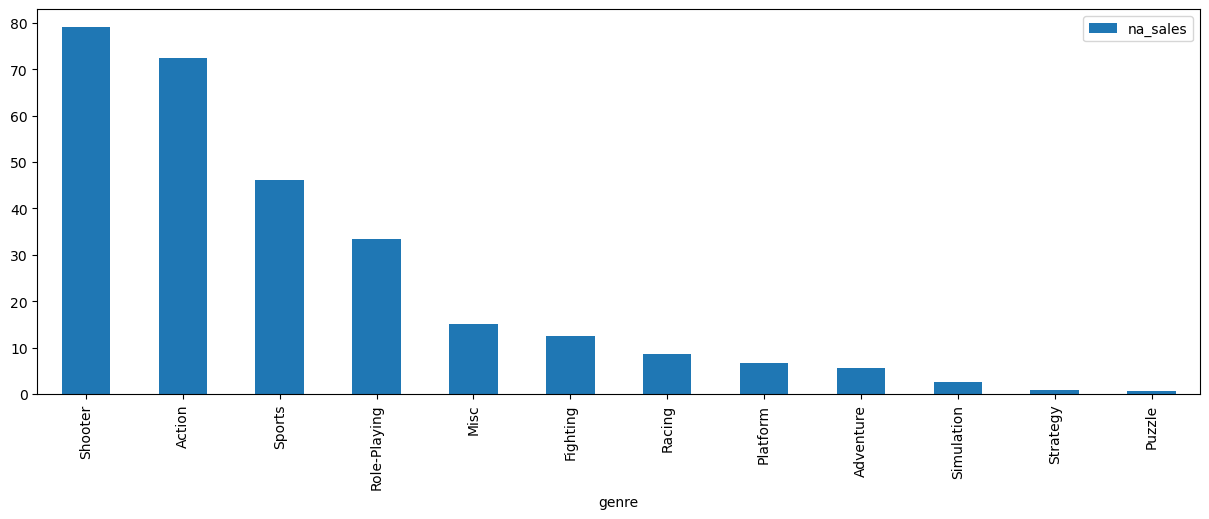

In [56]:
actual_data.pivot_table(
    index = 'genre', values = 'na_sales', aggfunc = 'sum'
    ).sort_values(ascending=False, by = 'na_sales'
    ).plot(kind = 'bar', figsize=(15,5)
    );

 Самые популярные жанры компьютерных игр среди жителей Северной Америки - это Shooter, Action, Sports, Role-Playing,  Misc.

Посмотрим на самые популярные платформы в Европе.

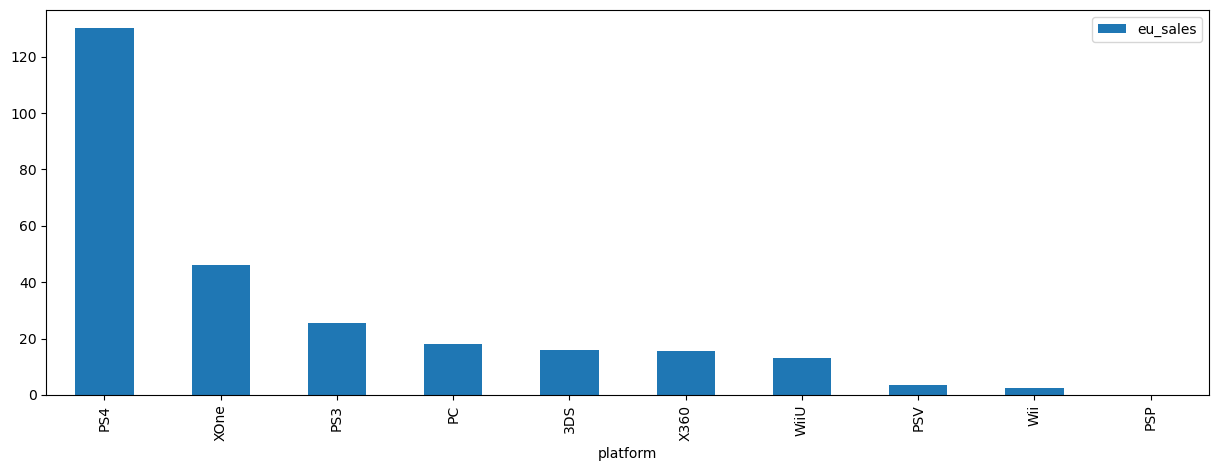

In [57]:
actual_data.pivot_table(
    index = 'platform', values = 'eu_sales', aggfunc = 'sum'
    ).sort_values(ascending=False, by = 'eu_sales'
    ).plot(kind = 'bar', figsize=(15,5)
    );

Самой популярной среди жителей Европы оказалась платформа PS4, далее с большим отрывом идет XOne, далее PS3 и РС  почти на одном уровне.

Посмотрим на самые популярные жанры в Европе.

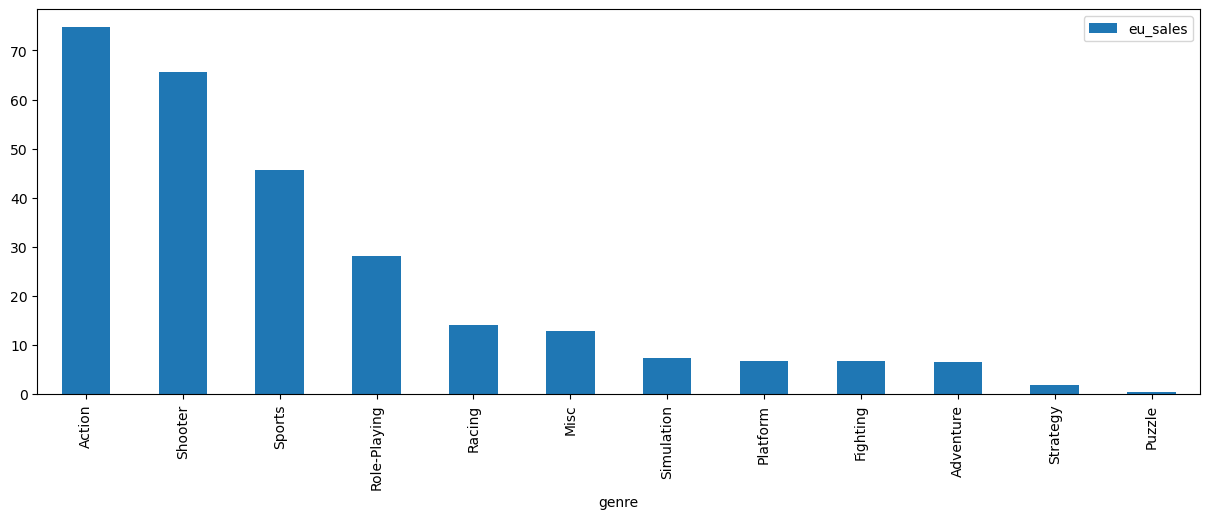

In [58]:
actual_data.pivot_table(
    index = 'genre', values = 'eu_sales', aggfunc = 'sum'
    ).sort_values(ascending=False, by = 'eu_sales'
    ).plot(kind = 'bar', figsize=(15,5)
    );

Жители Европы отдают свои предпочтения жанрам Action, Shooter, Sports, Role-Playing и Racing. 

Посмотрим на самые популярные платформы в Японии.

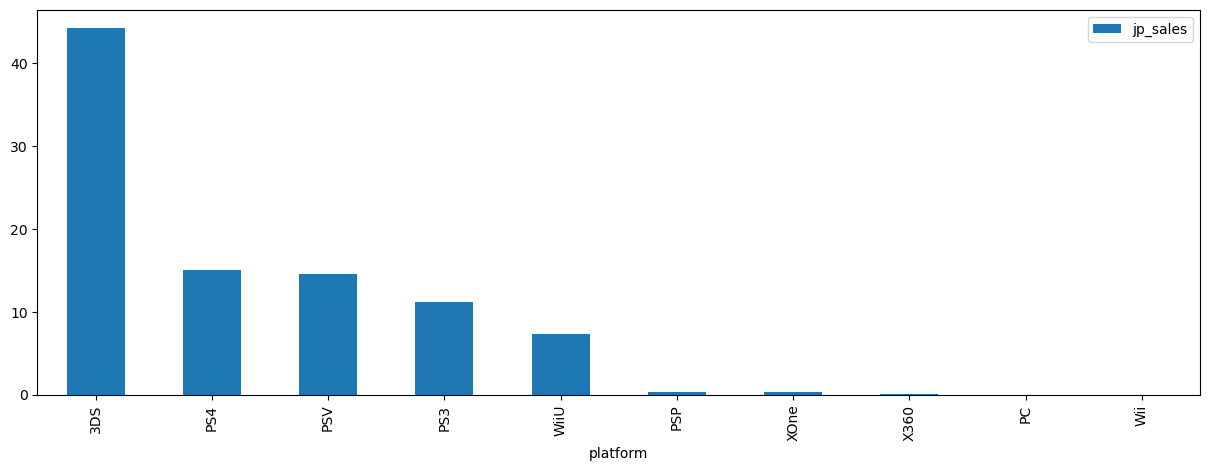

In [59]:
actual_data.pivot_table(
    index = 'platform', values = 'jp_sales', aggfunc = 'sum'
    ).sort_values(ascending=False, by = 'jp_sales'
    ).plot(kind = 'bar', figsize=(15,5)
    );

Жители Японии предпочитают другие платформы. Так, на первом месте по популярности 3DS, далее с большим отрывом почти на одном уровне PS4, PSV, и чуть ниже PS3.

Посмотрим на самые популярные жанры в Японии.

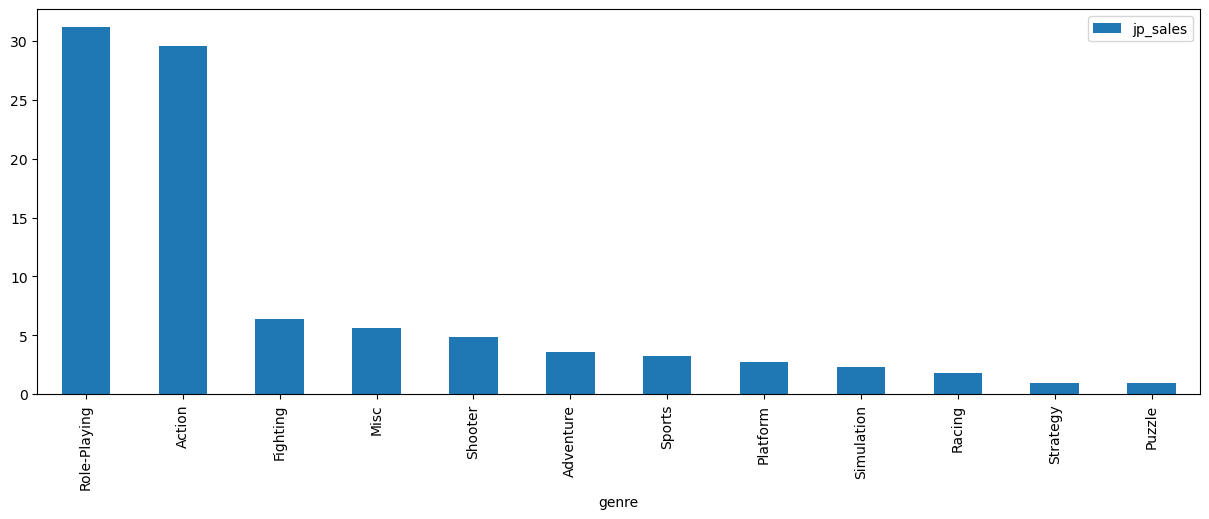

In [60]:
actual_data.pivot_table(
    index = 'genre', values = 'jp_sales', aggfunc = 'sum'
    ).sort_values(ascending=False, by = 'jp_sales'
    ).plot(kind = 'bar', figsize=(15,5)
    );

Картина с популярными жанрами в Японии тоже  отличается от жителей Северной Америки и Европы. Самые популярные игры  - это Role-Playing и Action, далее с большим отрывом почти на 1 уровне Fighting, Misc и Shooter. Картина в предпочтениях действительно отличается. 

Посмотрим как влияет рейтинг ESRB на продажи в отдельном регионе.
1. «E» («Everyone») — «Для всех»
2. «T» («Teen») — «Подросткам»
3. «M» («Mature») — «Для взрослых»
4. «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»
5. «EC»(«K-A» - в ранних версиях с 1994-1997 годы) («Early childhood») — «Для детей младшего возраста»
6. «AO» («Adults Only 18+») — «Только для взрослых»
7. «RP» («Rating Pending») — «Рейтинг ожидается»

In [61]:
ESRB = actual_data.pivot_table(index = 'rating', values = ['eu_sales','jp_sales','na_sales'], aggfunc = 'sum')
ESRB

,eu_sales,jp_sales,na_sales
rating,,,
0,47.67,54.45,54.15
E,58.27,8.98,50.76
E10+,27.56,4.77,34.61
M,101.85,8.61,104.26
T,35.33,16.28,40.28


Рейтинг влияет на популярность игр в разных странах. В Европе самые продаваемые игры с рейтингом "Для взрослых", далее почти в половину меньше продаются "Для всех", а потом не слишком отставая идут игры без указания рейтинга и ниже "Для подростков". Жители Японии меньше всего обращают внимание на указание рейтинга, там игры без указания рейтинга лидируют с большим отрывом, за ними идут игры "Для подростков","Для взрослых" и "Для всех". Жители Северной Америки также как и европейцы больше всего предпочитают игры "Для взрослых", далее почти на одном уровне с большим отставанием идут игры без указания рейтинга и "Для всех", а потом "Для подростков".

**Шаг 5. Проверка гипотезы "средние пользовательские рейтинги платформ Xbox One и PC одинаковые".**

Сформулируем "нулевую" и "альтернативную" гипотезы".

H₀   "Средние пользовательские рейтинги платформ Xbox One и PC равны между собой".

H₁   "Средние пользовательские рейтинги платформ Xbox One и PC не равны между собой".

In [62]:
XOne = data[(data['platform'] == 'XOne')]['user_score'].dropna().to_list();
print('Дисперсия XOne =', np.var(XOne))
PC = data[(data['platform'] == 'PC')]['user_score'].dropna().to_list();                 
print('Дисперсия PC =', np.var(PC)) 

Дисперсия XOne = 1.8965188383045526
Дисперсия PC = 2.3377471580367684


Посчитаем дисперсии для определения параметра equal_var, который отвечает на вопрос за считать ли равными дисперсии. В нашем случае дисперсии не равны, зададим параметр equal_var =False.  Уровень статистической значимости возьмем alpha = 0.05.

In [63]:
alpha = 0.05

results = st.ttest_ind(XOne, PC, equal_var = False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 4.935072360183574e-06
Отвергаем нулевую гипотезу


Нулевая гипотеза о равенстве средних пользовательских рейтингов платформ Xbox One и PC отвергнута. Средние рейтинги не равны между собой.

**Проверка гипотезы "средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные"**.

Сформулируем "нулевую" и "альтернативную" гипотезы".

H₀   "Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») равны между собой".

H₁    "Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») не  равны между собой".

In [64]:
Action = actual_data[(actual_data['genre'] == 'Action')]['user_score'].dropna().to_list();
print('Дисперсия Action =', np.var(Action))
Sports = actual_data[(actual_data['genre'] == 'Sports')]['user_score'].dropna().to_list();                 
print('Дисперсия Sports =', np.var(Sports))   

Дисперсия Action = 1.89208448117539
Дисперсия Sports = 3.4198375596751185


Посчитаем дисперсии для определения параметра equal_var, который отвечает на вопрос за считать ли равными дисперсии. В нашем случае дисперсии не равны, зададим параметр equal_var =False. Уровень статистической значимости возьмем alpha = 0.05.


In [65]:
alpha = 0.05

results = st.ttest_ind(Action, Sports, equal_var = False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.1825550382644557e-14
Отвергаем нулевую гипотезу


Нулевая гипотеза о равенстве средних пользовательских рейтингов жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования» отвергнута. Средние рейтинги не равны между собой.

В блоке "Проверка гипотез" проверялись данные о равенстве средних пользовательских оценок двух платформ Xbox One и PC и двух жанров игр Action и Sports. Дисперсии данных были не равны. Уровень статистической значимости взят не слишком строгий 0.05. Обе нулевые гипотезы о равенстве оказались опровергнуты с помощью t - теста, средние пользовательские рейтинги в двух исследованиях оказались различны между собой. 

**Шаг 6. Общие выводы.**

Анализируемые данные о продажах в Северной Америке, Европе и Японии различных компьютерных игр с оценками критиков, пользователей и возрастным рейтингом ESRB содержали более 17.6 тысяч записей. В данных были выявлены некоторые проблемы в виде отсутствующих значений. Дубликатов обнаружено не было. В некоторых случаях пришлось оставить нулевые значения. Последующий анализ данных был произведен с учетом наличия нулевых значений в колонках с годами выпуска игр, рейтингом и оценками критиков и пользователей. Часть пропущенных данных по играм в колонке с рейтингом удалось достать из данных по этим же играм, вышедшим на других платформах, но с заполненной колонкой по рейтингу. В датасет добавлен столбец с общими данными продажам во всех регионах.
Проведенный анализ данных позволяет сделать следующие выводы:
1. Индустрия компьютерных игр начала свое развитие в 1980 году с выпуска 9 игр на платформе 2600. По данным интернета  Atari 2600 стала первой успешной приставкой с играми на картриджах и двумя джойстиками. Далее стремительное развитие индустрии началось с 1994 года, стало появляться разнообразие игровых платформ. Настоящий бум в индустрии наступил в начале 2000 годов и длился до упадка 2016 года. Проведенное исследование позволило определить что средний возраст жизни игровой платформы составляет 11 лет.  
2. На примере 10 самых популярных по количеству выпущенных игр платформ можно сказать что в период пика развития индустрии некоторые платформы продавали до 200 мл.копий игр (PS2 и Wii), а PS, DS, X360, PS3 свыше 150 млн.копий. Исследование показало, что развитие этих платформ подошло к концу. Однако, можно выделить перспективную платформу по количеству игр и хорошему объему  продаж (60 млн. копий на 2016 год) PS4, которая находится в стадии развития и не завершила свой жизненный цикл длинною в 11 лет, также можно выделить платформу РС (5.2 млн.копий продано на 2016 год)  как перспективное направление, поскольку ее график не имел большого пика, он плоский, имеет широкое распределение, и благодаря этому, твердо утверждать, что его развитие подошло к концу, невозможно. Не имея большого пика выпуска игр, эта платформа стабильно сохраняет свое существование практически без изменений, на продолжение жизни этой платформы можно рассчитывать.
3. Период для прогнозирования данных на 2017 год выбран с 2014 по 2016 год, поскольку индустрия компьютерных игр очень изменчива, и брать более ранние года для прогнозирования было бы не верным. Данные ранее 2014 года далее не участвовали в исследовательском процессе. 
4. Благодаря построенным графикам визуализации распределения ("ящик с усами") в картине перспективных платформ появилась еще и платформа XOne, которая  не являлась лидером по количеству игр, но на графике "ящик с усами" показала хорошие результаты продаж, похожие на PS4. 
5. Далее рассмотрена корреляция на примере платформы X360  между общими продажами и оценкой критиков. Получено значение индекса корреляции 0.53 - это средней силы прямая связь.  Связь между продажами во всех регионах и отзывами пользователя 0.33 - связь есть, но  не значительная.  Более сильную прямую связь показала оценка пользователей и оценка критиков между собой (0.62).
6. Исследования популярности игровых жанров показало, что самые большие продажи занимает жанр экшен, спортивные игры и стрелялки. Соответственно 22, почти 16 и 14 процентов. Самые не приносящие прибыль жанры это стратегии и пазлы.

Поведенное исследование позволяет сделать вывод о различии в пользовательском игровом предпочтении жителей Северной Америки, Европы и Японии. Это различие достаточно значительное. На продажи игр влияет: место жительства человека (менталитет), наиболее популярная платформа в регионе проживания человека (мода, возможность обсуждения с друзьями), и жанр, выбор которого тоже связан с культурным кодом места жительства. А вот отсутствие  рейтинга ассоциации, определяющей возрастной рейтинг компьютерных игр (ESRB) неожиданно показало  не очень сильно влияние на продажи. Игры без указания рейтинга одинаково хорошо продаются во всех исследуемых регионах.

Так игры, которые будут популярны среди жителей Северной Америки:
1. ESRB: M, отсутствие рейтигна, E
   Платформ(в порядке убывания): PS4, Xone, X360, 
   Жанры: Shooter, Action, Sports, Role-Playing.

Для жителей Европы: 
1. ESRB: M, Е, отсутствие рейтинга 
   Платформ(в порядке убывания): PS4, XOne,  PS3 
   Жанры: Action, Shooter, Sports, Role-Playing, Racing.
   
Для жителей Японии: 
1. ESRB: отсутствие рейтинга, Т, Е
   Платформы: 3DS, PS4, PSV.
   Жанры: Role-Playing и Action, Fighting, Misc, Shooter.